In [18]:
import netCDF4 as nc4

with nc4.Dataset('squall_gsfcForced_ten.nc') as f:
    q3dten_M=f.variables['q3dten'][10::2,:]
    q3d_M=f.variables['q3d'][10::2,:]
    prs_M=f.variables['prs'][10::2,:]
    w3d_M=f.variables['w3d'][10::2,:]
    th3d_M=f.variables['th3d'][10::2,:]
    th3dten_M=f.variables['th3dten'][10::2,:]



In [19]:
q3dVIL=q3d_M[:,:,:,:,1:6].sum(axis=-1).sum(axis=-1).flatten()

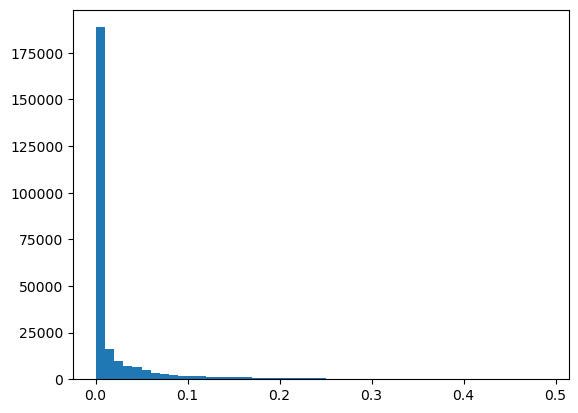

In [20]:
import matplotlib.pyplot as plt
import numpy as np
h1=plt.hist(q3dVIL,bins=np.arange(0,0.5,0.01))

In [21]:
import numpy as np
a=np.nonzero(q3d_M[:,:,:,:,1:6].sum(axis=-1).sum(axis=-1)>0.001)
print(len(a[0]))

119749


In [22]:
qsL,qgL,qrL,qcL,qiL,thL,pressL,qvL,qs_tendL,qr_tendL,qc_tendL,qg_tendL,qi_tendL,qv_tendL,th_tendL=[[] for k in range(15)]
qtotL=[]
wsL=[]
for it,i,j in zip(a[0],a[1],a[2]):
    qsL.append(q3d_M[it,i,j,:,4])
    qvL.append(q3d_M[it,i,j,:,0])
    qcL.append(q3d_M[it,i,j,:,1])
    qrL.append(q3d_M[it,i,j,:,2])
    qiL.append(q3d_M[it,i,j,:,3])
    qgL.append(q3d_M[it,i,j,:,5])
    qtotL.append(q3d_M[it,i,j,:,1:6].sum(axis=-1))
    thL.append(th3d_M[it,i,j,:])
    pressL.append(prs_M[it,i,j,:])
    wsL.append(w3d_M[it,i,j,:])
    qs_tendL.append(q3dten_M[it,i,j,:,4])
    qv_tendL.append(q3dten_M[it,i,j,:,0])
    qc_tendL.append(q3dten_M[it,i,j,:,1])
    qr_tendL.append(q3dten_M[it,i,j,:,2])
    qi_tendL.append(q3dten_M[it,i,j,:,3])
    qg_tendL.append(q3dten_M[it,i,j,:,5])
    th_tendL.append(th3dten_M[it,i,j,:])

               

In [23]:
import netCDF4 as nc4
with nc4.Dataset('outputMorrison/cm1out.nc') as f:
    z=f.variables['zh'][:]
print(z[64])
import xarray as xr
qvL_=xr.DataArray(np.array(qvL)[:,:64],dims=['time','z'],coords={'time':np.arange(len(qvL)),'z':z[:64]})
qsL_=xr.DataArray(np.array(qsL)[:,:64],dims=['time','z'],coords={'time':np.arange(len(qsL)),'z':z[:64]})
qcL_=xr.DataArray(np.array(qcL)[:,:64],dims=['time','z'],coords={'time':np.arange(len(qcL)),'z':z[:64]})
qrL_=xr.DataArray(np.array(qrL)[:,:64],dims=['time','z'],coords={'time':np.arange(len(qrL)),'z':z[:64]})
qiL_=xr.DataArray(np.array(qiL)[:,:64],dims=['time','z'],coords={'time':np.arange(len(qiL)),'z':z[:64]})
qgL_=xr.DataArray(np.array(qgL)[:,:64],dims=['time','z'],coords={'time':np.arange(len(qgL)),'z':z[:64]})
thL_=xr.DataArray(np.array(thL)[:,:64],dims=['time','z'],coords={'time':np.arange(len(thL)),'z':z[:64]})
pressL_=xr.DataArray(np.array(pressL)[:,:64],dims=['time','z'],coords={'time':np.arange(len(pressL)),'z':z[:64]})
wsL_=xr.DataArray(np.array(wsL)[:,:64],dims=['time','z'],coords={'time':np.arange(len(wsL)),'z':z[:64]})
qs_tendL_=xr.DataArray(np.array(qs_tendL)[:,:64],dims=['time','z'],coords={'time':np.arange(len(qs_tendL)),'z':z[:64]})
qv_tendL_=xr.DataArray(np.array(qv_tendL)[:,:64],dims=['time','z'],coords={'time':np.arange(len(qv_tendL)),'z':z[:64]})
qc_tendL_=xr.DataArray(np.array(qc_tendL)[:,:64],dims=['time','z'],coords={'time':np.arange(len(qc_tendL)),'z':z[:64]})
qr_tendL_=xr.DataArray(np.array(qr_tendL)[:,:64],dims=['time','z'],coords={'time':np.arange(len(qr_tendL)),'z':z[:64]})
qi_tendL_=xr.DataArray(np.array(qi_tendL)[:,:64],dims=['time','z'],coords={'time':np.arange(len(qi_tendL)),'z':z[:64]})
qg_tendL_=xr.DataArray(np.array(qg_tendL)[:,:64],dims=['time','z'],coords={'time':np.arange(len(qg_tendL)),'z':z[:64]})
th_tendL_=xr.DataArray(np.array(th_tendL)[:,:64],dims=['time','z'],coords={'time':np.arange(len(th_tendL)),'z':z[:64]})
qtotL_=xr.DataArray(np.array(qtotL)[:,:64],dims=['time','z'],coords={'time':np.arange(len(qtotL)),'z':z[:64]})
ds=xr.Dataset({'qv':qvL_,'qs':qsL_,'qc':qcL_,'qr':qrL_,'qi':qiL_,'qg':qgL_,'th':thL_,'press':pressL_,'ws':wsL_,'qs_tend':qs_tendL_,'qv_tend':qv_tendL_,'qc_tend':qc_tendL_,'qr_tend':qr_tendL_,'qi_tend':qi_tendL_,'qg_tend':qg_tendL_,'th_tend':th_tendL_,'qtot':qtotL_})
compLev=5
ds.to_netcdf('goddardProfilesForced.nc',encoding={'qv':{'zlib':True,'complevel':compLev},'qs':{'zlib':True,'complevel':compLev},'qc':{'zlib':True,'complevel':compLev},'qr':{'zlib':True,'complevel':compLev},'qi':{'zlib':True,'complevel':compLev},'qg':{'zlib':True,'complevel':compLev},'th':{'zlib':True,'complevel':compLev},'press':{'zlib':True,'complevel':compLev},'ws':{'zlib':True,'complevel':compLev},'qs_tend':{'zlib':True,'complevel':compLev},'qv_tend':{'zlib':True,'complevel':compLev},'qc_tend':{'zlib':True,'complevel':compLev},'qr_tend':{'zlib':True,'complevel':compLev},'qi_tend':{'zlib':True,'complevel':compLev},'qg_tend':{'zlib':True,'complevel':compLev},'th_tend':{'zlib':True,'complevel':compLev},'qtot':{'zlib':True,'complevel':compLev}})

13.375001


In [24]:
print(np.array(qtotL).shape)

(112041, 86)


In [24]:
#d={'dqv_m_clust':dqv_m_clust,'dth_m_clust':dth_m_clust,'kmeans':kmeans,'z':z[:64],'scaler':scaler,'icount_m_clust':icount_m_clust}
#pickle.dump(d,open('morrison_clustered_tend.pklz','wb'))
#read d
import pickle
d=pickle.load(open('morrison_clustered_tend.pklz','rb'))
scaler=d['scaler']
kmeans=d['kmeans']
qtot64_L=np.array(qtotL)[:,:64]
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
qtot64_Ls=scaler.transform(qtot64_L)
#from sklearn.cluster import MiniBatchKMeans

#kmeans = MiniBatchKMeans(n_clusters=16,random_state=0,batch_size=1000).fit(qtot64_Ls)


In [25]:
nc=16
labels_=kmeans.predict(qtot64_Ls)
dqv_m_clust=np.zeros((nc,64),float)
dth_m_clust=np.zeros((nc,64),float)
icount_m_clust=np.zeros((nc),float)
for icluster in range(nc):
    a=np.nonzero(labels_==icluster)
    icount_m_clust[icluster]=len(a[0])
    dqv_m_clust[icluster,:]=np.array(qv_tendL)[a[0],:64].mean(axis=0)
    dth_m_clust[icluster,:]=np.array(th_tendL)[a[0],:64].mean(axis=0)

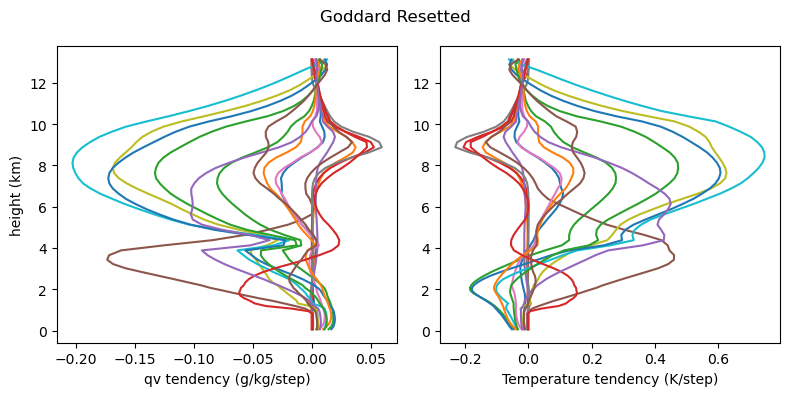

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
ncs=4
plt.suptitle('Goddard Resetted')
for i in range(ncs):
    for j in range(ncs):
        #plt.subplot(ncs,ncs,i*ncs+j+1)
        ic=ncs*i+j
        plt.subplot(121)
        plt.plot(dqv_m_clust[ic,:]*1e3,z[:64],label='cluster '+str(ic))
        plt.xlabel('qv tendency (g/kg/step)')
        plt.ylabel('height (km)')
        #plt.legend()
        #plt.xlim(-0.0001,0.0001)
        plt.subplot(122)
        plt.plot(dth_m_clust[ic,:],z[:64])
        plt.xlabel('Temperature tendency (K/step)')

plt.tight_layout()

plt.savefig('goddardForced_clustered_tend.png')

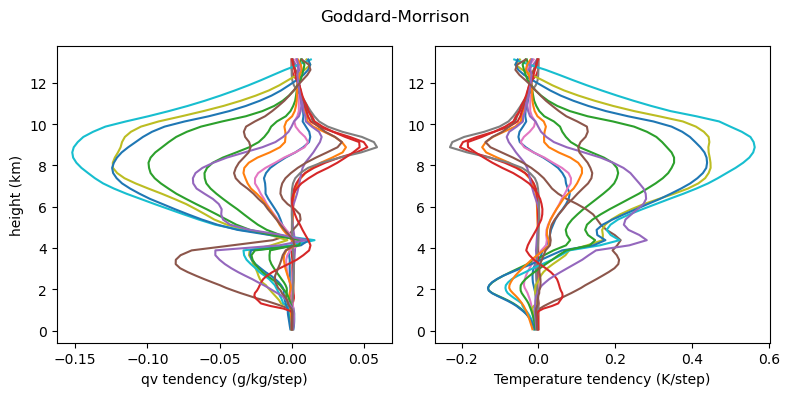

In [27]:
plt.figure(figsize=(8,4))
ncs=4
plt.suptitle('Goddard-Morrison')
dqv_mr_clust=d['dqv_m_clust']
dth_mr_clust=d['dth_m_clust']
for i in range(ncs):
    for j in range(ncs):
        #plt.subplot(ncs,ncs,i*ncs+j+1)
        ic=ncs*i+j
        plt.subplot(121)
        plt.plot((dqv_m_clust[ic,:]-dqv_mr_clust[ic,:])*1e3,z[:64],label='cluster '+str(ic))
        plt.xlabel('qv tendency (g/kg/step)')
        plt.ylabel('height (km)')
        #plt.legend()
        #plt.xlim(-0.0001,0.0001)
        plt.subplot(122)
        plt.plot((dth_m_clust[ic,:]-dth_mr_clust[ic,:]),z[:64])
        plt.xlabel('Temperature tendency (K/step)')

plt.tight_layout()
plt.savefig('goddard-morrison_clustered_tend.png')
#import pickle
#d={'dqv_m_clust':dqv_m_clust,'dth_m_clust':dth_m_clust,'kmeans':kmeans,'z':z[:64],'scaler':scaler,'icount_m_clust':icount_m_clust}
#pickle.dump(d,open('morrison_clustered_tend.pklz','wb'))

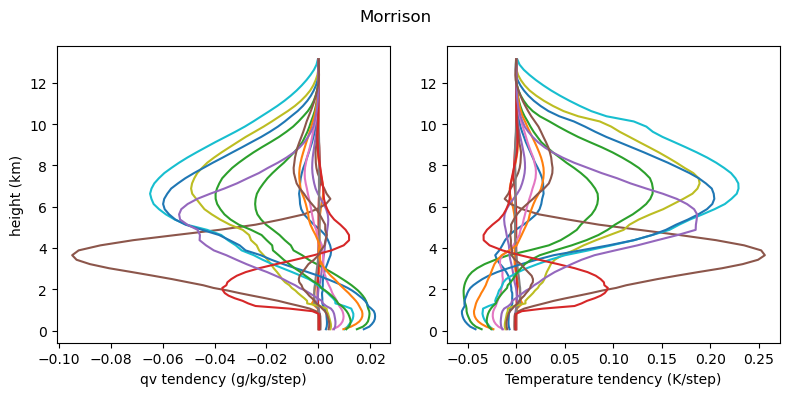

In [15]:
plt.figure(figsize=(8,4))
ncs=4
plt.suptitle('Morrison')
dqv_mr_clust=d['dqv_m_clust']
dth_mr_clust=d['dth_m_clust']
for i in range(ncs):
    for j in range(ncs):
        #plt.subplot(ncs,ncs,i*ncs+j+1)
        ic=ncs*i+j
        plt.subplot(121)
        plt.plot((dqv_mr_clust[ic,:])*1e3,z[:64],label='cluster '+str(ic))
        plt.xlabel('qv tendency (g/kg/step)')
        plt.ylabel('height (km)')
        #plt.legend()
        #plt.xlim(-0.0001,0.0001)
        plt.subplot(122)
        plt.plot((dth_mr_clust[ic,:]),z[:64])
        plt.xlabel('Temperature tendency (K/step)')

plt.tight_layout()
plt.savefig('morrison_clustered_tend.png')